In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time

In [2]:
from run_functions import *
from agent_functions import *
from plot_functions import *

In [3]:
from routing_networks import *
# from recommenders import *

In [4]:
def heuristic_recommender(Q, n_agents):
    S = np.zeros(n_agents)
    flexible = []
    force_up = []
    force_down = []
    force_cross = []
    arg_max_Q = np.argmax(Q, axis=2)

    for i, argmax_q_table in enumerate(arg_max_Q):
        if 0 in argmax_q_table:  # could the agent go up?
            if 1 in argmax_q_table: # could the agent go down?
                flexible.append(i)  # if both, store for later assignment
#                 print(i, "flexible", argmax_q_table)
            else:
                force_up.append(i)  # if only up, assign agent to go up
#                 print(i, "up", argmax_q_table)
        elif 1 in argmax_q_table:
                force_down.append(i) # if only down, assign agent to go down
#                 print(i, "down", argmax_q_table)
        else:
            force_cross.append(i) # add logic for sure crossers
#             print(i, "cross", argmax_q_table)
    
#     print("force up", force_up)
#     print("force down", force_down)
#     print("force cross", force_cross)
#     print("flexible", flexible)
    
    n_flexible = len(flexible)
    n_up = len(force_up)
    n_down = len(force_down)
    n_cross = len(force_cross)
    
#     print(n_up, n_down, n_cross, n_flexible)
#     print("flexible \n", flexible)
    diff_up_down = n_up - n_down
    
    if abs(diff_up_down) >= n_flexible:
        if diff_up_down > 0:
            # assign all flexible to down
            while len(flexible) > 0: force_down.append(flexible.pop())
        else:
            # assign all flexible to up
            while len(flexible) > 0: force_up.append(flexible.pop())
                
    elif abs(diff_up_down) < n_flexible:
        if diff_up_down > 0:
            # assign #diff_up_down flexible to down
            for x in range(abs(diff_up_down)): force_down.append(flexible.pop())
        else:
            # assign #diff_up_down flexible to up
            for x in range(abs(diff_up_down)): force_up.append(flexible.pop())
                
        # split remaining flexible up and down equally
        counter = 0
        while len(flexible) > 0:
            if counter%2 == 0:
                force_down.append(flexible.pop())
            else:
                force_up.append(flexible.pop())
            counter += 1
    
#     print("force up", force_up)
#     print("force down", force_down)
#     print("force cross", force_cross)
#     print("flexible", flexible)
    
    travel_time_estimate = [
        1+(1-n_cross/n_agents)/2+n_cross/n_agents,  # up 
        1+(1-n_cross/n_agents)/2+n_cross/n_agents,  # down
        1+n_cross/n_agents                          # cross
    ]
    
    for i in force_up:
        recommendations_that_force = np.argwhere(arg_max_Q[i]==0).flatten()
#         print(recommendations_that_force)
        belief_differences = - travel_time_estimate[0] - Q[i, recommendations_that_force, 0]
#         if len(belief_differences) == 0:
#             print(i, " has len 0")
        best_recommendation = np.argmax(belief_differences)
#         print(best_recommendation)
        S[i] = recommendations_that_force[best_recommendation]
    
    for i in force_down:
        recommendations_that_force = np.argwhere(arg_max_Q[i]==1).flatten()
        belief_differences = - travel_time_estimate[1] - Q[i, recommendations_that_force, 1]
        best_recommendation = np.argmax(belief_differences)
        S[i] = recommendations_that_force[best_recommendation]
    
    for i in force_cross:
        recommendations_that_force = np.argwhere(arg_max_Q[i]==2).flatten()
        belief_differences = - travel_time_estimate[2] - Q[i, recommendations_that_force, 2]
        best_recommendation = np.argmin(belief_differences)
        S[i] = recommendations_that_force[best_recommendation]
        
    return S.astype(int)

In [154]:
n_agents = 100
Q = initialize_q_table("UNIFORM", n_agents, 3, 3)

In [155]:
Q

array([[[-1.18037071, -1.53325248, -1.02920222],
        [-1.66299261, -1.31208968, -1.80862344],
        [-1.56649962, -1.46392342, -1.48650537]],

       [[-1.11871933, -1.41827575, -1.55462905],
        [-1.25687527, -1.94632924, -1.66577754],
        [-1.76840373, -1.45163925, -1.81868599]],

       [[-1.13413644, -1.84642201, -1.42201641],
        [-1.58548146, -1.60986446, -1.98687343],
        [-1.81574578, -1.51150393, -1.15233051]],

       [[-1.68984992, -1.39034528, -1.96700321],
        [-1.36100286, -1.86981897, -1.85385094],
        [-1.20643052, -1.84861223, -1.75730895]],

       [[-1.10412304, -1.92722261, -1.7738023 ],
        [-1.5017851 , -1.24306314, -1.27795668],
        [-1.65331276, -1.05640924, -1.10094994]],

       [[-1.19489119, -1.2585184 , -1.55546698],
        [-1.57951133, -1.12618284, -1.56055432],
        [-1.10382714, -1.99948921, -1.7759269 ]],

       [[-1.57157543, -1.81482252, -1.41862942],
        [-1.31026525, -1.98162903, -1.81352669],
        

In [157]:
S = np.zeros(n_agents)
flexible = []
force_up = []
force_down = []
force_cross = []
arg_max_Q = np.argmax(Q, axis=2)
alignment_table = arg_max_Q[:,:3] == np.broadcast_to(np.arange(3), (n_agents, 3))  # alignment of up and down, only
print(alignment_table)

[[False  True False]
 [ True False False]
 [ True False  True]
 [False False False]
 [ True  True False]
 [ True  True False]
 [False False  True]
 [ True False  True]
 [ True  True  True]
 [ True False  True]
 [False False False]
 [False False False]
 [False  True False]
 [False  True  True]
 [False  True  True]
 [ True False  True]
 [False  True  True]
 [ True  True  True]
 [False False False]
 [False  True False]
 [False False False]
 [False False False]
 [False  True False]
 [False  True  True]
 [ True False False]
 [False False  True]
 [ True False False]
 [ True  True False]
 [False  True False]
 [False  True False]
 [False False  True]
 [ True False False]
 [ True False False]
 [ True  True  True]
 [ True False False]
 [False False False]
 [False False False]
 [False  True False]
 [False  True False]
 [False False False]
 [False False False]
 [False False False]
 [ True False  True]
 [ True False False]
 [False False False]
 [False  True False]
 [ True False False]
 [False False

In [158]:
aligned_both = []
aligned_up = []
aligned_down = []
aligned_cross = []
misaligned = []

for i, alignings in enumerate(alignment_table):
        if alignings[0]:  # could the agent go up?
            if alignings[1]: # could the agent go down?
                aligned_both.append(i)  # if both, store for later assignment
#                 print(i, "flexible", argmax_q_table)
            else:
                aligned_up.append(i)  # if only up, assign agent to go up
#                 print(i, "up", argmax_q_table)
        elif alignings[1]:
                aligned_down.append(i) # if only down, assign agent to go down
#                 print(i, "down", argmax_q_table)
        elif alignings[2]:
            aligned_cross.append(i) # add logic for sure crossers
#             print(i, "cross", argmax_q_table)
        else:
            misaligned.append(i)

print("force up", aligned_up)
print("force down", aligned_down)
print("force cross", aligned_cross)
print("flexible", aligned_both)
print("misaligned", misaligned)

force up [1, 2, 7, 9, 15, 24, 26, 31, 32, 34, 42, 43, 46, 49, 65, 66, 68, 69, 70, 83, 84, 87, 92, 99]
force down [0, 12, 13, 14, 16, 19, 22, 23, 28, 29, 37, 38, 45, 58, 60, 62, 63, 67, 74, 75, 85, 89, 91]
force cross [6, 25, 30, 52, 57, 61, 72, 73, 79, 88, 96]
flexible [4, 5, 8, 17, 27, 33, 55, 59, 64, 78, 81, 86, 90, 93, 94]
misaligned [3, 10, 11, 18, 20, 21, 35, 36, 39, 40, 41, 44, 47, 48, 50, 51, 53, 54, 56, 71, 76, 77, 80, 82, 95, 97, 98]


In [159]:
for i in aligned_up: S[i] = 0

for i in aligned_down: S[i] = 1

for i in aligned_cross: S[i] = 2
    
S

array([1., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 2., 0., 0., 1., 1., 2., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 2., 0., 0., 0., 0., 2., 1., 0., 1., 2., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 2., 2., 1., 1., 0., 0., 0., 2., 0., 0., 0., 0., 0.,
       1., 0., 0., 2., 1., 0., 1., 0., 0., 0., 0., 2., 0., 0., 0.])

In [160]:
n_cross = len(aligned_cross)+len(misaligned)
n_cross

38

In [161]:
travel_time_estimate = calculate_travel_time_estimate(n_cross, n_agents)

In [162]:
for i in misaligned:
#     misaligned_belief_distance = np.max(Q[i], axis=1) - Q[i].diagonal()
    belief_difference_from_estimate = -(- np.array(travel_time_estimate) - np.max(Q[3], axis=1))
    S[i] = np.argmax(belief_difference_from_estimate)
misaligned

[3,
 10,
 11,
 18,
 20,
 21,
 35,
 36,
 39,
 40,
 41,
 44,
 47,
 48,
 50,
 51,
 53,
 54,
 56,
 71,
 76,
 77,
 80,
 82,
 95,
 97,
 98]

In [164]:
# the process below is supposed to find the recommendation whos max is furthest from the estimate and closest to
# the correctly aligned action for the recommendation

In [163]:
belief_difference_from_estimate = np.array([-(-np.array(travel_time_estimate) - np.max(Q[i], axis=1) - Q.diagonal()) for i in range(n_agents)])
S = np.argmax(belief_difference_from_estimate, axis=1)

In [137]:
Q[i, np.argmax(Q[i]), np.argmax(Q[i])]

IndexError: index 4 is out of bounds for axis 1 with size 3

In [144]:
Q[i, np.arange(3), np.arange(3)]

array([-1.91046566, -1.7890368 , -1.88666633])

In [150]:
travel_time_estimate

<function __main__.travel_time_estimate(n_cross, n_agents)>

In [50]:
# belief_difference_from_estimate, S

In [51]:
diff_up_down = len(aligned_up) - len(aligned_down)
n_flexible = len(aligned_both)
print(n_flexible)

if abs(diff_up_down) >= n_flexible > 0:
    if diff_up_down > 0:
        # assign all flexible to down
        while len(aligned_both) > 0: S[aligned_both.pop()] = 1
    else:
        # assign all flexible to up
        while len(aligned_both) > 0: S[aligned_both.pop()] = 0

elif abs(diff_up_down) < n_flexible > 0:
    if diff_up_down > 0:
        # assign #diff_up_down flexible to down
        for x in range(abs(diff_up_down)): S[aligned_both.pop()] = 1
    else:
        # assign #diff_up_down flexible to up
        for x in range(abs(diff_up_down)): S[aligned_both.pop()] = 0

    # split remaining flexible up and down equally
    counter = 0
    while len(aligned_both) > 0:
        if counter%2 == 0:
            S[aligned_both.pop()] = 1
        else:
            S[aligned_both.pop()] = 0
        counter += 1

11


In [52]:
S

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 2,
       1, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0])

In [152]:
def calculate_travel_time_estimate(n_cross, n_agents):
    return [
            1+(1-n_cross/n_agents)/2+n_cross/n_agents,  # up 
            1+(1-n_cross/n_agents)/2+n_cross/n_agents,  # down
            1+n_cross/n_agents                          # cross
            ]

In [124]:
def aligned_heuristic_recommender(Q, n_agents):
    S = np.zeros(n_agents)
    arg_max_Q = np.argmax(Q, axis=2)
    alignment_table = arg_max_Q[:,:3] == np.broadcast_to(np.arange(3), (n_agents, 3))  # alignment of up and down, only
    
    aligned_both = []
    aligned_up = []
    aligned_down = []
    aligned_cross = []
    misaligned = []

    for i, alignings in enumerate(alignment_table):
        if alignings[0]:  # could the agent go up?
            if alignings[1]: # could the agent also go down?
                aligned_both.append(i)  # if both, store for later assignment
            else:
                aligned_up.append(i)  # if only up, assign agent to go up
        elif alignings[1]:
                aligned_down.append(i) # if only down, assign agent to go down
        elif alignings[2]:
            aligned_cross.append(i)
        else:
            misaligned.append(i)
    
    n_cross = len(aligned_cross)+int(len(misaligned)/3)  # optimistic estimate of crossers
    # assuming all those aligned only to cross, and a third of those misaligned
    
    if n_cross <= 1/2*n_agents:  # if LESS than half of the agents will cross

        S[aligned_up] = 0  # assign all aligned recommendations possible
        S[aligned_down] = 1
        S[aligned_cross] = 2
        
        # assign misaligned agents to recommendations that most alter their misaligned beliefs
        # travel time estimates are updated as more information is available
        # thus, misaligned is shuffled at the beginning
        np.random.shuffle(misaligned)
        for i in misaligned:
            travel_time_estimate = calculate_travel_time_estimate(n_cross, n_agents)
            belief_difference_from_estimate = -(- np.array(travel_time_estimate) - np.max(Q[i], axis=1))
            recommendation = np.argmax(belief_difference_from_estimate)
            S[i] = recommendation
            action = Q[i, recommendation].argmax()
            if action == 2: n_cross += 1  # update crosses, if agent expected to cross, to improve estimate
        
        diff_up_down = len(aligned_up) - len(aligned_down)
        n_flexible = len(aligned_both)

        if abs(diff_up_down) >= n_flexible > 0:
            if diff_up_down > 0:
                # assign all flexible to down
                while len(aligned_both) > 0: S[aligned_both.pop()] = 1
            else:
                # assign all flexible to up
                while len(aligned_both) > 0: S[aligned_both.pop()] = 0

        elif abs(diff_up_down) < n_flexible > 0:
            if diff_up_down > 0:
                # assign #diff_up_down flexible to down
                for x in range(abs(diff_up_down)): S[aligned_both.pop()] = 1
            else:
                # assign #diff_up_down flexible to up
                for x in range(abs(diff_up_down)): S[aligned_both.pop()] = 0

            # split remaining flexible up and down equally
            counter = 0
            while len(aligned_both) > 0:
                if counter%2 == 0:
                    S[aligned_both.pop()] = 1
                else:
                    S[aligned_both.pop()] = 0
                counter += 1
    else:
        travel_time_estimate = calculate_travel_time_estimate(n_cross, n_agents)
#         S[aligned_cross] = 2
#         S[aligned_up] = 1
#         S[aligned_down] = 0
        belief_difference_from_estimate = np.array([-(- np.array(travel_time_estimate) - np.max(Q[i], axis=1)) for i in range(n_agents)])
        S = np.argmax(belief_difference_from_estimate, axis=1)
        
    
    return S.astype(int)

### Testing Braess Recommenders

In [131]:
N_AGENTS = 100
N_STATES = 3
N_ACTIONS = 3
N_ITER = 20000

EPSILON = 0.01
mask = np.zeros(N_AGENTS)
mask[:] = 1
GAMMA = 0
ALPHA = 0.1

QINIT = "ALIGNED"  # np.array([-2, -2, -2])

In [132]:
%%time
# Q = initialize_q_table(QINIT, N_AGENTS, N_STATES, N_ACTIONS)

if ALPHA == "UNIFORM":
    ALPHA = np.random.random_sample(size=N_AGENTS)

if EPSILON == "UNIFORM":
    EPSILON = np.random.random_sample(size=N_AGENTS) * mask
else:
    EPSILON = EPSILON * np.ones(N_AGENTS) * mask

M = {}
ind = np.arange(N_AGENTS)
S = np.random.randint(N_STATES, size=N_AGENTS)
R = np.ones(N_AGENTS) * -2
A = np.random.randint(N_STATES, size=N_AGENTS)

for t in range(N_ITER):
    
#     S = recommender(Q=Q, initial_guess=A, n_actions=N_ACTIONS, objective=objective)
#     S = heuristic_recommender(Q, N_AGENTS)
    S = aligned_heuristic_recommender(Q, N_AGENTS)
#     print(Q)
    A = e_greedy_select_action(Q, S, EPSILON)

    R, travel_time_per_route = braess_augmented_network(A)

    Q, sum_of_belief_updates = bellman_update_q_table(Q, S, A, R, ALPHA, GAMMA)
    
    ## SAVE PROGRESS DATA
    M[t] = {"nA": np.bincount(A, minlength=3),
            "R": R,
            "Qmean": Q.mean(axis=1).mean(axis=0),
            "groups": count_groups(Q[ind, S, :], 0.1),
            "Qvar": Q[ind, S, :].var(axis=0),
            "nA": np.bincount(A, minlength=3),
            "T": travel_time_per_route,
            "sum_of_belief_updates": sum_of_belief_updates,
            "alignment": calculate_alignment(Q)
           }

CPU times: user 25.4 s, sys: 61.2 ms, total: 25.5 s
Wall time: 25.5 s


In [133]:
alignment = np.array([M[t]["alignment"] for t in range(int(0.8 * N_ITER), N_ITER)])
alignment = alignment.mean(axis=0)

In [134]:
alignment

array([0.1031875, 0.11133  , 0.56     ])

test2


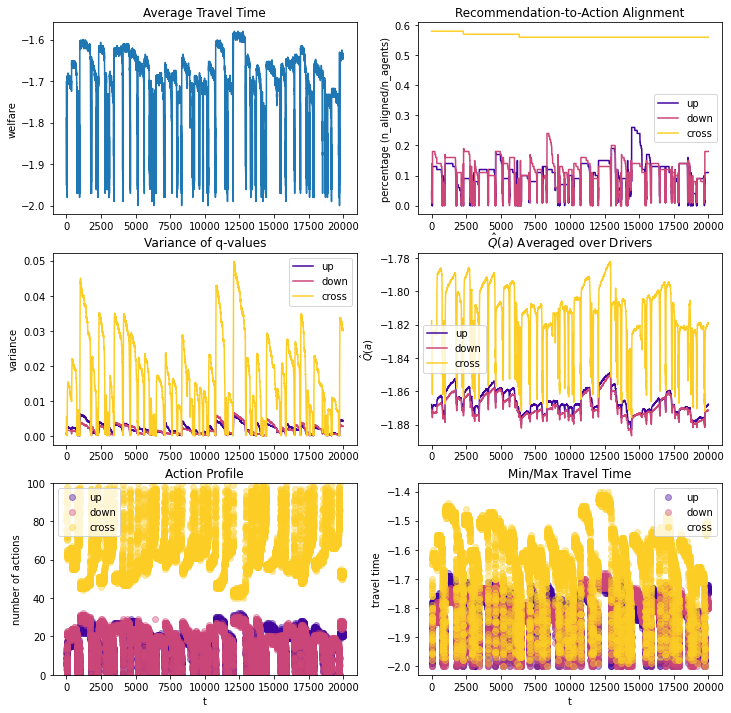

In [135]:
plot_run(M, "test2", N_AGENTS, N_ACTIONS, N_ITER)

In [ ]:
plt.plot([M[t]["alignment"] for t in range(N_ITER)], label=["up", "down", "cross"])
plt.legend()

In [ ]:
plt.plot([M[t]["Qvar"] for t in range(N_ITER)], label=["up", "down", "cross"])
plt.legend()

In [ ]:
plt.plot([M[t]["sum_of_belief_updates"] for t in range(N_ITER)])

In [ ]:
plot_run(M, "test", N_AGENTS, N_ACTIONS, N_ITER)

## Two Route Game

In [ ]:
def two_route_game(A):
    n_agents = len(A)
    n_up = (A == 0).sum()
    
    r_0 = n_up/n_agents
    r_1 = 1
    T = [-r_0, -r_1]

    R = np.array([T[i] for i in A])
    return R, T

In [ ]:
N_AGENTS = 100
N_STATES = 2
N_ACTIONS = 2
N_ITER = 1000

EPSILON = 0.01
mask = np.zeros(N_AGENTS)
mask[:] = 1
GAMMA = 0
ALPHA = 0.25

QINIT = - np.random.random_sample((N_AGENTS, N_STATES, N_ACTIONS))  # "UNIFORM"  # np.array([-2, -2, -2])
objective = total_welfare

In [ ]:
Q = InitializeQTable(QINIT, N_AGENTS, N_STATES, N_ACTIONS)

if ALPHA == "UNIFORM":
    ALPHA = np.random.random_sample(size=N_AGENTS)

if EPSILON == "UNIFORM":
    EPSILON = np.random.random_sample(size=N_AGENTS) * mask
else:
    EPSILON = EPSILON * np.ones(N_AGENTS) * mask

M = {}

S = np.random.randint(N_STATES, size=N_AGENTS)
# R = np.ones(N_AGENTS) * -1
A = np.random.randint(N_STATES, size=N_AGENTS)

for t in range(N_ITER):
    
    S = recommender(Q=Q, initial_guess=A, n_actions=N_ACTIONS, objective=objective)
    
    A = e_greedy_select_action(Q, S, EPSILON)

    R, travel_time_per_route = two_route_game(A)

    Q, sum_of_belief_updates = bellman_update_q_table(Q, S, A, R, ALPHA, GAMMA)

    ## SAVE PROGRESS DATA
    M[t] = {"nA": np.bincount(A, minlength=3),
            "R": R,
            "Qmean": Q.mean(axis=1).mean(axis=0),
            # "groups": count_groups(Q[ind, S, :], 0.1),
            # "Qvar": Q[ind, S, :].var(axis=0),
            "nA": np.bincount(A, minlength=3),
            "T": travel_time_per_route,
           }

# Live Recommender Tool (needs sudo)

In [ ]:
import keyboard

In [ ]:
N_AGENTS = 100
N_STATES = 3
N_ACTIONS = 3
N_ITER = 20000

EPSILON = 0.1
mask = np.zeros(N_AGENTS)
mask[:] = 1
GAMMA = 0
ALPHA = 0.25

QINIT = "UNIFORM"  # np.array([-2, -2, -2])

In [ ]:
Q = InitializeQTable(QINIT, N_AGENTS, N_STATES, N_ACTIONS)

if ALPHA == "UNIFORM":
    ALPHA = np.random.random_sample(size=N_AGENTS)

if EPSILON == "UNIFORM":
    EPSILON = np.random.random_sample(size=N_AGENTS) * mask
else:
    EPSILON = EPSILON * np.ones(N_AGENTS) * mask

M = {}

S = np.random.randint(N_STATES, size=N_AGENTS)
R = np.ones(N_AGENTS) * -2
A = np.random.randint(N_STATES, size=N_AGENTS)

In [ ]:
# %matplotlib widget

fig = plt.figure(figsize=(10,8))
hfig = display(fig, display_id=True)
recommender_on = False

on_timesteps = []
off_timesteps = []

for t in range(N_ITER):
    if keyboard.is_pressed("r"):
        recommender_on = True
        on_timesteps.append(t)
        S = heuristic_recommender(Q, N_AGENTS)
    elif keyboard.is_pressed("e"):
        recommender_on = False
        off_timesteps.append(t)
        S = S
    
#     S = recommender_next_state(R, Q, S, A, recommender_on)
    
    A = e_greedy_select_action(Q, S, EPSILON)

    R, _ = braess_augmented_network(A)

    Q, _ = bellman_update_q_table(Q, S, A, R, ALPHA, GAMMA)

    ## SAVE PROGRESS DATA
    M[t] = {"nA": np.bincount(A, minlength=3),
            "R": R,
            "Qmean": Q.mean(axis=1).mean(axis=0),
            # "groups": count_groups(Q[ind, S, :], 0.1),
            # "Qvar": Q[ind, S, :].var(axis=0)
           }
    
    plt.clf()
    plt.plot(np.arange(0, t, 1), [M[i]["R"].mean() for i in range(t)])
#     plt.plot(on_timesteps, [M[i]["R"].mean() for i in on_timesteps])
#     plt.plot(off_timesteps, [M[i]["R"].mean() for i in off_timesteps])
#     ax2.hist(np.bincount(S))
    fig.canvas.draw()
    hfig.update(fig)
    time.sleep(0.1)
    